In [284]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt



In [285]:
train = pd.read_csv(r'D:\sm_project\train.csv', nrows=100000)
test = pd.read_csv(r'D:\sm_project\test.csv')

In [286]:
train.shape

(100000, 8)

In [287]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [288]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [289]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [290]:
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [291]:
train = train.dropna(how = 'any',axis='rows')

In [292]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [293]:
train.shape



(100000, 8)

In [294]:
train['fare_amount'].describe()


count    100000.000000
mean         11.354652
std           9.716777
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         200.000000
Name: fare_amount, dtype: float64

In [295]:
train = train.drop(train[train['fare_amount']<0].index,axis=0)

In [296]:
train.shape

(99991, 8)

In [297]:
train['fare_amount'].describe()


count    99991.000000
mean        11.356387
std          9.714697
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: fare_amount, dtype: float64

In [298]:
train['passenger_count'].describe()

count    99991.000000
mean         1.673761
std          1.300083
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [299]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [300]:
train = train.drop(train[train['passenger_count']>=6].index,axis=0)

In [301]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [302]:
train["pickup_latitude"].describe()

count    97952.000000
mean        39.914786
std          6.191761
min        -74.007670
25%         40.734940
50%         40.752725
75%         40.767237
max        401.083332
Name: pickup_latitude, dtype: float64

In [303]:
train[train["pickup_latitude"]< -90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [304]:
train[train["pickup_latitude"]> 90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1


In [305]:
train = train.drop(train[train["pickup_latitude"]> 90].index,axis=0)
train = train.drop(train[train["pickup_latitude"]< -90].index,axis=0)

In [306]:
train.shape

(97951, 8)

In [307]:
train["pickup_longitude"].describe()

count    97951.000000
mean       -72.490415
std         10.701732
min       -736.550000
25%        -73.992054
50%        -73.981804
75%        -73.967013
max         40.787575
Name: pickup_longitude, dtype: float64

In [308]:
# we have drop the longitube more than 100 and less than - 100
#   nyc longi is from approximately -74.05 to -73.75 

train = train.drop(train[train["pickup_longitude"]< -100].index,axis=0)
train = train.drop(train[train["pickup_longitude"]> 100].index,axis=0)

In [309]:
train.shape

(97950, 8)

In [310]:
train["dropoff_latitude"].describe()

count    97950.000000
mean        39.920738
std          6.175279
min        -74.001000
25%         40.734195
50%         40.753245
75%         40.768180
max        404.616667
Name: dropoff_latitude, dtype: float64

In [311]:

train = train.drop(train[train["dropoff_latitude"]<-90].index,axis=0)
train = train.drop(train[train["dropoff_latitude"]> 90].index,axis=0)


In [312]:
train[train["dropoff_latitude"]<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [313]:
train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [314]:
train.shape

(97949, 8)

In [315]:
train = train.drop(train[train["dropoff_longitude"]> 100].index,axis=0)
train = train.drop(train[train["dropoff_longitude"]< -100].index,axis=0)



In [316]:
train[train["dropoff_longitude"]<-100]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [317]:
train.dtypes


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [318]:
train['key'] = pd.to_datetime(train['key'])
train["pickup_datetime"] = pd.to_datetime(train['pickup_datetime'])

In [319]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [320]:
test['key'] = pd.to_datetime(test['key'])
test["pickup_datetime"] = pd.to_datetime(test['pickup_datetime'])

In [321]:
def haversine_distance(lat1,long1,lat2,long2):
    data = [train,test]
    for i in data:
        R = 6371
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lamba = np.radians(i[long2]-i[long1])

        
        a = np.sin(delta_phi / 2.0 ) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lamba / 2.0) ** 2

        c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))

        d = (R * c)
        i['H_Distance'] = d
    return d




In [322]:
haversine_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [323]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [324]:
data = [train,test]


In [325]:
# for i in data:
#     i['Year'] = i["pickup_datetime"].dt.year
#     i['Month'] = i["pickup_datetime"].dt.month
#     i['Day'] = i["pickup_datetime"].dt.day
#     i['Day of Week'] = i["pickup_datetime"].dt.dayofweek
#     i['Hour'] = i["pickup_datetime"].dt.hour


# Iterate over each DataFrame in the 'data' list
for i in data:
    # Extract and store the year component of the 'pickup_datetime' column
    i['Year'] = i["pickup_datetime"].dt.year
    
    # Extract and store the month component of the 'pickup_datetime' column
    i['Month'] = i["pickup_datetime"].dt.month
    
    # Extract and store the day component of the 'pickup_datetime' column
    i['Day'] = i["pickup_datetime"].dt.day
    
    # Extract and store the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday) of the 'pickup_datetime' column
    i['Day of Week'] = i["pickup_datetime"].dt.dayofweek
    
    # Extract and store the hour component of the 'pickup_datetime' column
    i['Hour'] = i["pickup_datetime"].dt.hour


Text(0, 0.5, 'Frequency')

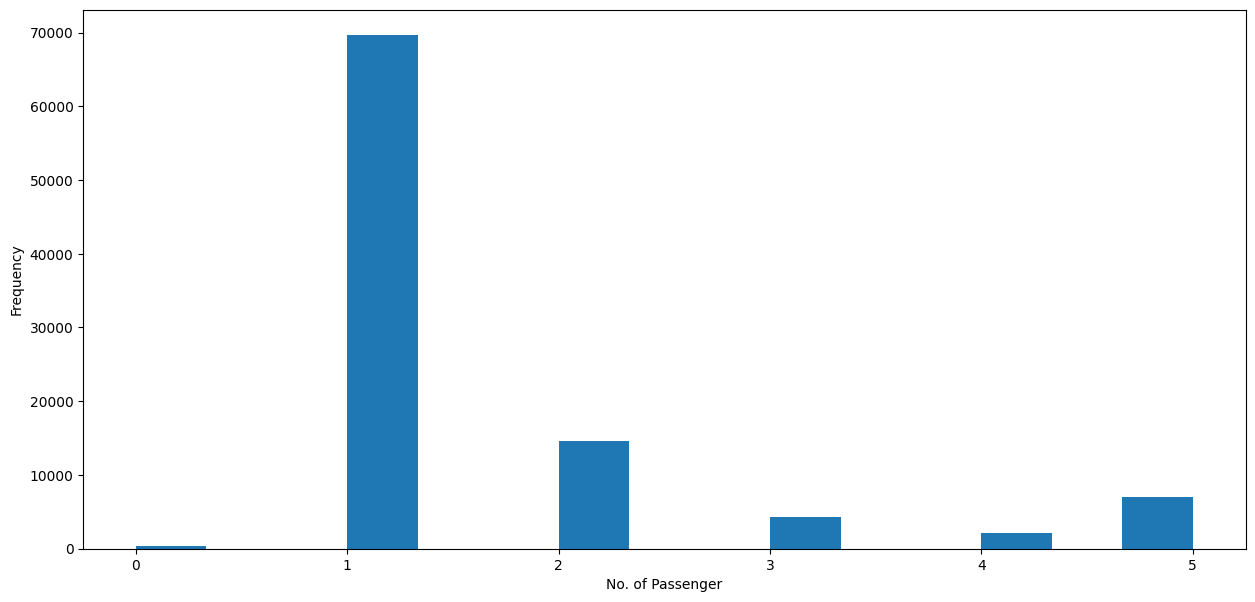

In [326]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'],bins=15)
plt.xlabel('No. of Passenger')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

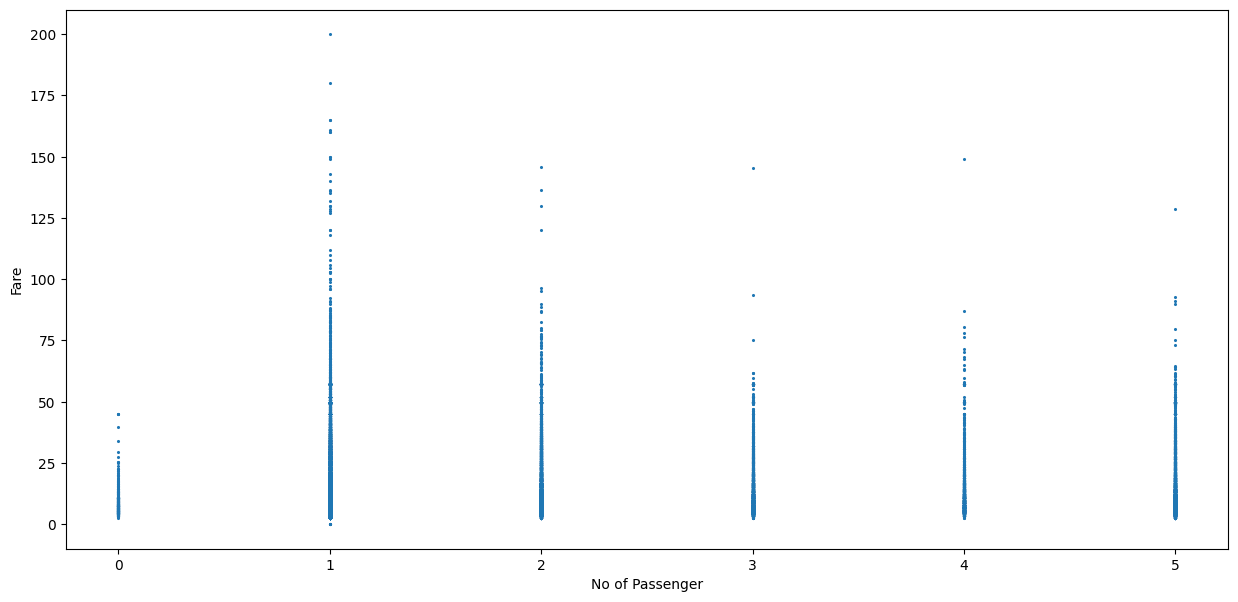

In [327]:
plt.figure(figsize=(15,7))
plt.scatter(x = train['passenger_count'],y = train['fare_amount'],s =1.5)
plt.xlabel('No of Passenger')
plt.ylabel('Fare')

In [328]:
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [379]:
x1 = train[['pickup_latitude', 'pickup_longitude','H_Distance']]
x1 = sm.add_constant(x1)
y1=train['fare_amount']

In [380]:
model1 = sm.OLS(y1,x1).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 4.248e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:50:22   Log-Likelihood:            -3.2080e+05
No. Observations:               97949   AIC:                         6.416e+05
Df Residuals:                   97945   BIC:                         6.416e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1825      0.148     14.772      0.000       1.893       2.472
pickup_latitude     -0.1027      0.019     -5.539      0.000      -0.139      -0.066
pickup_longitude    -0.1041      0.011     -9.681      0.000      -0.125      -0.083
H_Distance           1.6389      0.005    356.978      0.000       1.630       1.648
==============================================================================
Omnibus:                   118101.414   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        448842992.399
Skew:                          -5.299   Prob(JB):                         0.00
Kurtosis:                     334.460   Cond. No.                         605.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
x2 = train[['dropoff_longitude', 'dropoff_latitude','H_Distance']]
x2 = sm.add_constant(x2)
y2=train['fare_amount']

model2 = sm.OLS(y2,x2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 4.249e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:52:55   Log-Likelihood:            -3.2079e+05
No. Observations:               97949   AIC:                         6.416e+05
Df Residuals:                   97945   BIC:                         6.416e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.1749      0.148     14.737      0.000       1.886       2.464
dropoff_longitude    -0.1079      0.010    -10.364      0.000      -0.128      -0.087
dropoff_latitude     -0.1093      0.018     -6.088      0.000      -0.144      -0.074
H_Distance            1.6386      0.005    357.010      0.000       1.630       1.648
==============================================================================
Omnibus:                   118034.027   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        448169604.550
Skew:                          -5.293   Prob(JB):                         0.00
Kurtosis:                     334.211   Cond. No.                         604.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
x3 = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'H_Distance']]
x3 = sm.add_constant(x3)
y3=train['fare_amount']

model2 = sm.OLS(y3,x3).fit()

model2.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                 2.125e+04
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:54:20   Log-Likelihood:            -3.2078e+05
No. Observations:               97949   AIC:                         6.416e+05
Df Residuals:                   97942   BIC:                         6.416e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9897      0.152     13.057      0.000       1.691       2.288
pickup_longitude     -0.0363      0.019     -1.945      0.052      -0.073       0.000
pickup_latitude      -0.0143      0.034     -0.418      0.676      -0.081       0.053
dropoff_longitude    -0.0801      0.018     -4.437      0.000      -0.115      -0.045
dropoff_latitude     -0.1077      0.033     -3.222      0.001      -0.173      -0.042
passenger_count       0.0491      0.018      2.770      0.006       0.014       0.084
H_Distance            1.6390      0.005    357.035      0.000       1.630       1.648
==============================================================================
Omnibus:                   118126.553   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        449274392.724
Skew:                          -5.301   Prob(JB):                         0.00
Kurtosis:                     334.619   Cond. No.                         882.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
# model = smf.ols('fare_amount ~ passenger_count',train).fit()
X = train[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'H_Distance', 'Year', 'Month', 'Day', 'Day of Week', 'Hour']]
X = sm.add_constant(X)  
y = train['fare_amount']


model = sm.OLS(y, X).fit()

In [330]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     147.9
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:54:51   Log-Likelihood:            -3.6081e+05
No. Observations:               97949   AIC:                         7.216e+05
Df Residuals:                   97937   BIC:                         7.218e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1268.3358     33.470    -37.895      0.000   -1333.937   -1202.735
pickup_longitude      0.0471      0.028      1.678      0.093      -0.008       0.102
pickup_latitude       0.0493      0.052      0.955      0.339      -0.052       0.150
dropoff_longitude    -0.0377      0.027     -1.384      0.166      -0.091       0.016
dropoff_latitude     -0.0398      0.051     -0.788      0.431      -0.139       0.059
passenger_count       0.1319      0.027      4.929      0.000       0.079       0.184
H_Distance            0.0005    8.8e-05      5.560      0.000       0.000       0.001
Year                  0.6360      0.017     38.239      0.000       0.603       0.669
Month                 0.1108      0.009     12.333      0.000       0.093       0.128
Day                   0.0013      0.004      0.375      0.707      -0.006       0.008
Day of Week          -0.0189      0.016     -1.192      0.233      -0.050       0.012
Hour                 -0.0300      0.005     -6.331      0.000      -0.039      -0.021
==============================================================================
Omnibus:                    76610.801   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2240442.545
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      25.317   Cond. No.                     2.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
train.sort_values(['H_Distance','fare_amount'],ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
67343,2014-08-14 06:58:00.000000700,10.0,2014-08-14 06:58:00+00:00,-74.095877,40.718052,0.000000,0.000000,2,8674.621830,2014,8,14,3,6
54350,2012-07-03 19:55:00.000000211,45.0,2012-07-03 19:55:00+00:00,0.000000,0.000000,-74.039030,40.729718,1,8670.149806,2012,7,3,1,19
48996,2012-05-12 10:48:00.000000200,49.8,2012-05-12 10:48:00+00:00,-74.014917,40.713382,0.000000,0.000000,1,8667.818812,2012,5,12,5,10
51743,2015-01-10 18:41:30.000000100,7.5,2015-01-10 18:41:30+00:00,0.000000,0.000000,-74.008026,40.739788,1,8667.787593,2015,1,10,5,18
85267,2015-02-09 22:06:54.000000300,37.5,2015-02-09 22:06:54+00:00,0.000000,0.000000,-74.014015,40.709560,1,8667.666045,2015,2,9,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97030,2013-04-11 15:05:58.000000200,2.5,2013-04-11 15:05:58+00:00,-73.995580,40.766942,-73.995580,40.766942,1,0.000000,2013,4,11,3,15
97813,2009-01-07 07:24:40.000000300,2.5,2009-01-07 07:24:40+00:00,0.000000,0.000000,0.000000,0.000000,1,0.000000,2009,1,7,2,7
98128,2009-02-28 21:04:00.000000420,2.5,2009-02-28 21:04:00+00:00,-73.975453,40.760493,-73.975453,40.760493,5,0.000000,2009,2,28,5,21
99097,2012-12-31 08:17:07.000000100,2.5,2012-12-31 08:17:07+00:00,-73.901842,40.763935,-73.901842,40.763935,1,0.000000,2012,12,31,0,8


In [332]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the OLS model
# model = sm.OLS(y_train, X_train).fit()
# #
# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate R-squared value
# r2 = r2_score(y_test, y_pred)
# print("R-squared value:", r2)

# # Print summary of the model
# print(model.summary())

In [333]:
# sns.regplot(y=train.fare_amount, x=train.passenger_count, ci=None, scatter_kws={'color': 'orange', 's': 1.5})
# plt.xlim(-1, 6)
# plt.ylim(ymin=0)
# plt.show()

In [334]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins = pd.concat([bins_0, bins_1, bins_2, bins_3, bins_4, bins_5, bins_6])
# len(dist_bins)
dist_bins.columns
# dist_bins['bins']


Index(['H_Distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

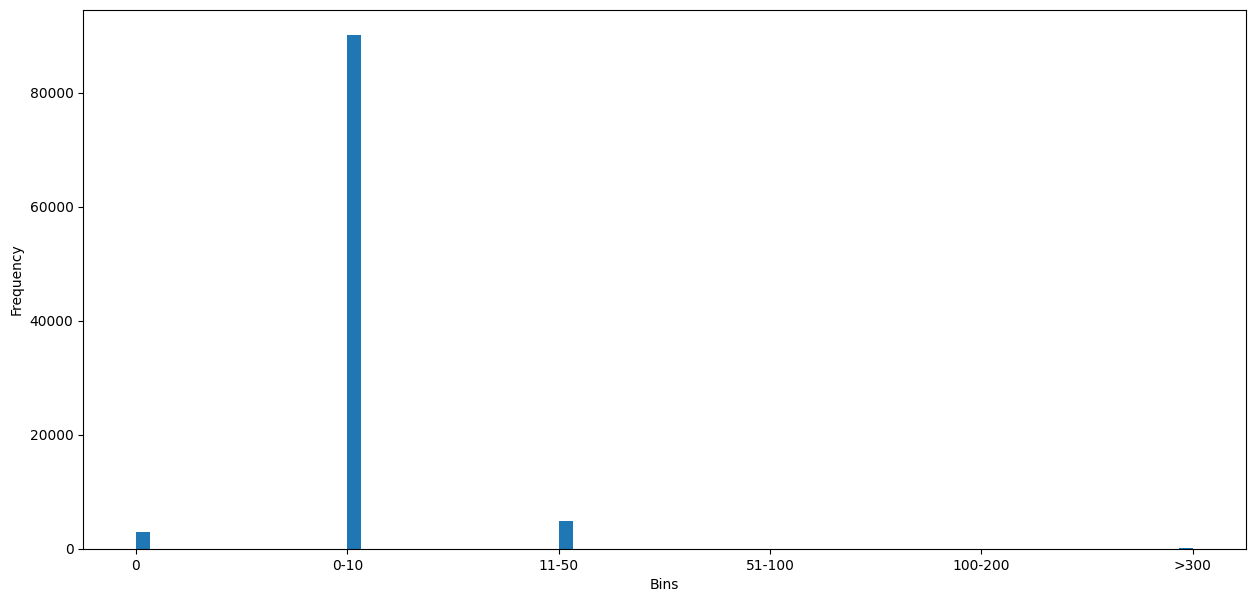

In [335]:
plt.figure(figsize=(15, 7))
plt.hist(dist_bins['bins'],bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [336]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour


In [337]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [338]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour


In [339]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour


In [340]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [341]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [342]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.7,2011-03-10 20:25:00+00:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,2011-08-29 08:24:00.000000107,8.9,2011-08-29 08:24:00+00:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,2012-06-24 17:11:10.000000100,45.0,2012-06-24 17:11:10+00:00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,2015-04-07 23:33:02.000000500,7.0,2015-04-07 23:33:02+00:00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98360,2012-07-13 17:01:00.000000107,8.9,2012-07-13 17:01:00+00:00,-1.383332,40.808887,-73.978395,40.779790,1,5921.327066,2012,7,13,4,17
98596,2014-07-20 04:26:00.000000270,19.0,2014-07-20 04:26:00+00:00,0.000000,0.000000,-73.959900,40.801250,1,8665.063366,2014,7,20,6,4
98652,2011-05-03 07:45:00.000000270,10.5,2011-05-03 07:45:00+00:00,-78.083332,40.705727,-74.005315,40.728592,1,343.669600,2011,5,3,1,7
99532,2012-06-25 18:44:00.000000144,8.9,2012-06-25 18:44:00+00:00,-73.978523,69.400000,-73.955138,40.779992,1,3182.399985,2012,6,25,0,18


In [343]:
high_distance.shape


(184, 14)

In [344]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

C:\Users\darsh\AppData\Local\Temp\ipykernel_16068\3428458477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_distance['H_Distance'] = high_distance.apply(


In [345]:

train.update(high_distance)

In [346]:
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,12,24,0,11
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,11,23,5,12
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2011,2,7,0,20
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,0.0,2009,3,25,2,0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2013,1,17,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,2011-12-21 09:36:00.000000155,13.7,2011-12-21 09:36:00+00:00,-73.937762,40.758157,-73.937762,40.758157,1,0.0,2011,12,21,2,9
99793,2011-11-08 08:54:00.000000790,6.1,2011-11-08 08:54:00+00:00,-73.998613,40.671772,-73.998613,40.671772,5,0.0,2011,11,8,1,8
99829,2012-04-01 17:02:00.000000500,24.9,2012-04-01 17:02:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,4,1,6,17
99904,2010-08-14 17:56:04.000000200,6.9,2010-08-14 17:56:04+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2010,8,14,5,17


In [347]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [348]:
train[(train['H_Distance']==0)].shape

(2889, 14)

In [349]:
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour


In [350]:
train=train.drop(rush_hour.index, axis=0)

In [351]:
train.shape

(97949, 14)

In [352]:
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2014,5,29,3,5
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00+00:00,-73.998720,40.624708,-73.998720,40.624708,1,0.0,2010,1,19,1,1
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21+00:00,-73.986410,40.763350,-73.986410,40.763350,1,0.0,2009,8,25,1,1
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2012,7,6,4,22
12953,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2010,7,23,4,3
16074,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40+00:00,-73.782520,40.644488,-73.782520,40.644488,1,0.0,2013,5,30,3,0
17862,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2014,8,21,3,23
18037,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00+00:00,-73.992220,40.759068,-73.992220,40.759068,2,0.0,2009,1,7,2,22
24835,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09+00:00,-73.983330,40.738205,-73.983330,40.738205,1,0.0,2015,2,27,4,2
29613,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11+00:00,-73.934842,40.740996,-73.934842,40.740996,1,0.0,2009,6,17,2,3


In [353]:
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00+00:00,0.000000,0.000000,-74.005433,40.726685,2,0.0,2009,2,22,6,22
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23+00:00,-73.956556,40.779828,-73.956556,40.779828,1,0.0,2013,7,21,6,0
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00+00:00,-73.950282,40.701282,-73.950282,40.701282,1,0.0,2012,8,27,0,15
4367,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48+00:00,-73.948410,40.744969,-73.948410,40.744969,1,0.0,2014,1,13,0,16
4954,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35+00:00,-73.983934,40.754938,-73.983934,40.754938,1,0.0,2010,1,10,6,13
6297,2010-11-15 09:29:00.000000191,2.5,2010-11-15 09:29:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2010,11,15,0,9
9177,2010-12-06 11:48:34.000000500,2.5,2010-12-06 11:48:34+00:00,-73.946993,40.744583,-73.946993,40.744583,3,0.0,2010,12,6,0,11
9621,2015-03-01 22:39:54.000000100,2.5,2015-03-01 22:39:54+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2015,3,1,6,22
11593,2010-10-17 04:28:00.000000150,2.9,2010-10-17 04:28:00+00:00,-73.851972,40.679820,-73.851972,40.679820,5,0.0,2010,10,17,6,4
13571,2009-03-09 12:26:25.000000100,2.5,2009-03-09 12:26:25+00:00,-73.416169,40.784140,-73.416169,40.784140,1,0.0,2009,3,9,0,12


In [354]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [355]:
len(scenario_3)

3

In [356]:
scenario_3.sort_values('H_Distance', ascending=False)
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

C:\Users\darsh\AppData\Local\Temp\ipykernel_16068\3280432119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenario_3['fare_amount'] = scenario_3.apply(


In [357]:
scenario_3['fare_amount']

10002    7.468230
27891    2.501660
47302    2.528736
Name: fare_amount, dtype: float64

In [358]:
train.update(scenario_3)

In [359]:
train.shape

(97949, 14)

In [360]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,12,24,0,11
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2013,11,23,5,12
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2011,2,7,0,20
105,2009-03-25 00:08:52.000000100,52.0,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,0.0,2009,3,25,2,0
124,2013-01-17 17:22:00.000000430,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,0.0,2013,1,17,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99787,2011-12-21 09:36:00.000000155,13.7,2011-12-21 09:36:00+00:00,-73.937762,40.758157,-73.937762,40.758157,1,0.0,2011,12,21,2,9
99793,2011-11-08 08:54:00.000000790,6.1,2011-11-08 08:54:00+00:00,-73.998613,40.671772,-73.998613,40.671772,5,0.0,2011,11,8,1,8
99829,2012-04-01 17:02:00.000000500,24.9,2012-04-01 17:02:00+00:00,0.000000,0.000000,0.000000,0.000000,3,0.0,2012,4,1,6,17
99904,2010-08-14 17:56:04.000000200,6.9,2010-08-14 17:56:04+00:00,0.000000,0.000000,0.000000,0.000000,1,0.0,2010,8,14,5,17


In [361]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [362]:
# Calculate the 'H_Distance' column for the DataFrame 'scenario_4_sub'
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
    # Use a lambda function to calculate the distance based on the fare_amount
    lambda row: ((row['fare_amount'] - 2.50) / 1.56),
    # Apply the lambda function along the rows (axis=1) of the DataFrame
    axis=1
)


C:\Users\darsh\AppData\Local\Temp\ipykernel_16068\1007821422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scenario_4_sub['H_Distance'] = scenario_4_sub.apply(


In [363]:
train.update(scenario_4_sub)

In [364]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Day', 'Day of Week',
       'Hour'],
      dtype='object')

In [365]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Day', 'Day of Week', 'Hour'],
      dtype='object')

In [411]:
from sklearn.decomposition import PCA

In [414]:
train.shape

(97949, 12)

In [413]:
pca = PCA()
test1=pca.fit(train)

In [415]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)

In [416]:
k

4

In [418]:
pca1=PCA(n_components=k)
train=pca1.fit_transform(train)

In [420]:
train.shape

(97949, 4)

In [ ]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [ ]:
x5 = train[['Year','Hour','H_Distance','passenger_count','fare_amount']]
x5 = sm.add_constant(x5)
y5 = train['fare_amount']

model5 = sm.OLS(y5,x5).fit()

model5.summary()

x5.corr

<bound method DataFrame.corr of        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0              4.5        -73.844311        40.721319         -73.841610   
1             16.9        -74.016048        40.711303         -73.979268   
2              5.7        -73.982738        40.761270         -73.991242   
3              7.7        -73.987130        40.733143         -73.991567   
4              5.3        -73.968095        40.768008         -73.956655   
...            ...               ...              ...                ...   
99995          9.0        -73.947977        40.784792         -73.964262   
99996          6.0        -73.962918        40.799107         -73.974178   
99997          5.0        -73.996773        40.723549         -73.991974   
99998          6.9        -73.983652        40.756667         -73.982715   
99999          5.7        -73.975663        40.791653         -73.982267   

       dropoff_latitude  passenger_count  H_Distance  Y

In [ ]:
model_data = train[['Year','Hour','H_Distance','passenger_count','fare_amount']]

In [ ]:
model_data.head(5)

,Year,Hour,H_Distance,passenger_count,fare_amount
0,2009,17,1.030764,1,4.5
1,2010,16,8.450134,1,16.9
2,2011,0,1.389525,2,5.7
3,2012,4,2.799270,1,7.7
4,2010,7,1.999157,1,5.3


In [ ]:
x = model_data[['Year','Hour','H_Distance','passenger_count']]
y = model_data[['fare_amount']]

In [ ]:
x10 = model_data[['Year','Hour','H_Distance','passenger_count','fare_amount']]
y10 = model_data[['fare_amount']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test = train_test_split(x10,y10,test_size=0.25,random_state=42)

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)




y_test_pred = model_lin.predict(X_test)
score = r2_score(Y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 100.0%


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=42)



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)




Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [ ]:
from sklearn.metrics import r2_score

y_test_pred = model_lin.predict(X_test)
score = r2_score(Y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 66.0%


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
abcd

In [ ]:
X_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model_rf = Pipeline((
    ("standard_scaler", StandardScaler()),
    ("rf_reg", RandomForestRegressor()),
))

param_grid = {
    'rf_reg__n_estimators': [50, 100, 150],
    'rf_reg__max_depth': [None, 10, 20],
    'rf_reg__min_samples_split': [2, 5, 10],
    'rf_reg__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

score = r2_score(Y_test, y_test_pred)
print("The accuracy of our model is {}%".format(round(score, 2) * 100))
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\darsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The accuracy of our model is 79.0%
Best Parameters: {'rf_reg__max_depth': 10, 'rf_reg__min_samples_leaf': 4, 'rf_reg__min_samples_split': 5, 'rf_reg__n_estimators': 150}
Best Score: 0.7783406983824631


In [ ]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:

# test_features = test[['Year', 'Hour', 'H_Distance', 'passenger_count']]
# X_test = test[test_features]
# filename = './output/predicted_fare'
# y_final = model.predict(X_test)
# submit = pd.DataFrame({'key': df_test.key, 'fare_amount': y_final},columns = ['key', 'fare_amount'])
# submit.to_csv('submission.csv', index = False)

In [ ]:
# from lightgbm import LGBMRegressor

In [ ]:
# params = {"objective" : "regression",
#           "boosting" : "gbdt", 
#           "metric" : "rmse",
#           "num_iterations" : 2000,
#           "top_k" : 30, 
#           "max_depth" : 8, 
#           "num_leaves" : 250, 
#           "min_data_in_leaf" : 20, 
#           "learning_rate" : 0.05,
#           "bagging_fraction" : 0.7, 
#           "bagging_seed" : 3,
#           "bagging_freq" : 5, 
#           "feature_fraction" : 0.5, 
#           "num_threads" : 4
#          }

In [ ]:

import joblib
import cv2

loaded_model = joblib.load('best_model.pkl')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select the relevant columns for prediction
test_features = test[['Year', 'Hour', 'H_Distance', 'passenger_count']]

train_features = train[['Year', 'Hour', 'H_Distance', 'passenger_count']]
# Scale the features
scaler = StandardScaler()
scaler.fit(train_features)

scaled_features = scaler.transform(test_features)

# Make predictions using the loaded model1
fare_amounts = loaded_model.predict(scaled_features)

# Print the predicted fare amounts
print(fare_amounts)

test['Predicted Fare Amount'] = fare_amounts

# Print the test data with predicted fare amounts
print(test)




[2.63107036 2.63107036 2.63107036 ... 9.95776104 5.51342362 2.74662676]
      pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.973320        40.763805         -73.981430         40.743835   
1           -73.986862        40.719383         -73.998886         40.739201   
2           -73.982524        40.751260         -73.979654         40.746139   
3           -73.981160        40.767807         -73.990448         40.751635   
4           -73.966046        40.789775         -73.988565         40.744427   
...                ...              ...                ...               ...   
9909        -73.968124        40.796997         -73.955643         40.780388   
9910        -73.945511        40.803600         -73.960213         40.776371   
9911        -73.991600        40.726608         -73.789742         40.647011   
9912        -73.985573        40.735432         -73.939178         40.801731   
9913        -73.988022        40.754070         

C:\Users\darsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
test.head(15)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Day,Day of Week,Hour,Predicted Fare Amount
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13,2.631070
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13,2.631070
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11,2.631070
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21,2.627265
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21,4.484547
5,-73.960983,40.765547,-73.979177,40.740053,1,3.222549,2012,12,1,5,21,2.627265
6,-73.949013,40.773204,-73.959622,40.770893,1,0.929601,2011,10,6,3,12,2.631070
7,-73.777282,40.646636,-73.985083,40.759368,1,21.540102,2011,10,6,3,12,11.027202
8,-74.014099,40.709638,-73.995106,40.741365,1,3.873962,2011,10,6,3,12,10.645288
9,-73.969582,40.765519,-73.980686,40.770725,1,1.099794,2014,2,18,1,15,2.631070
